In [3]:
# %%
# Jupyter Notebook cell 1 — Imports
import numpy as np
import pandas as pd

# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "S_parameter_vs_temp.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T       = data["Temperature [K]"].to_numpy()
I       = data["Intensity [W/cm²]"].to_numpy()
S       = data["S"].to_numpy()
FWHM    = data["FWHM [Hz]"].to_numpy()
Gam_tot = data["FWHM deph + FWHM0 [Hz]"].to_numpy()
Fluo    = data["Fluorescence [cps]"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T.shape, "→", T[:5])
print("I:", I.shape, "→", I[:5])
print("S:", S.shape, "→", S[:5])
print("FWHM:", FWHM.shape, "→", FWHM[:5])
print("Gam_tot:", Gam_tot.shape, "→", Gam_tot[:5])
print("Fluo:", Fluo.shape, "→", Fluo[:5])



,Temperature [K],Intensity [W/cm²],S,FWHM [Hz],FWHM deph + FWHM0 [Hz],Fluorescence [cps]
0,4.731820,0.428243,0.108321,2.535635e+08,2.408540e+08,15550.338565
1,4.777749,0.428243,0.123954,2.635728e+08,2.486144e+08,17547.096787
2,4.490514,0.428243,0.100211,2.133204e+08,2.033736e+08,14492.044091
3,5.075639,0.856485,0.225183,3.367827e+08,3.042631e+08,29243.322029
4,4.551905,1.712970,0.394787,2.508496e+08,2.124025e+08,45034.647029


T: (49,) → [4.73181998 4.77774867 4.49051393 5.07563945 4.55190483]
I: (49,) → [0.42824258 0.42824258 0.42824258 0.85648516 1.71297031]
S: (49,) → [0.10832125 0.12395445 0.10021059 0.22518313 0.39478694]
FWHM: (49,) → [2.53563457e+08 2.63572818e+08 2.13320427e+08 3.36782713e+08
 2.50849642e+08]
Gam_tot: (49,) → [2.40853984e+08 2.48614391e+08 2.03373581e+08 3.04263100e+08
 2.12402464e+08]
Fluo: (49,) → [15550.33856457 17547.09678679 14492.04409057 29243.32202877
 45034.64702943]


/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_10745/3388676620.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(T, S/I, 'o-', linestyle='none', marker='o', label="S vs T")
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_10745/3388676620.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(T, S/I, 'o-', linestyle='none', marker='o', label="S vs T")


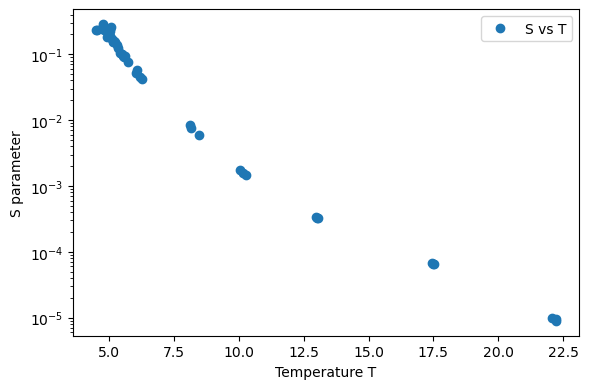

In [8]:
# %%
# (Optional) Example plot to verify data visually
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(T, S/I, 'o-', linestyle='none', marker='o', label="S vs T")
plt.xlabel("Temperature T")
plt.ylabel("S parameter")
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()